<a href="https://colab.research.google.com/github/Nithilan98/DataScience_Task_6/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.shape

(804, 12)

In [7]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [8]:
x = df[['Mileage']]
y = df[['Price']]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

Part 1

1. Find the linear regression equation for mileage vs price.

2. Chart the original data and the equation on the chart.

3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [12]:
#1 linear regression equation for mileage vs price
print('intercept:', reg.intercept_)
print('coefficients:', reg.coef_)

intercept: [25581.3915351]
coefficients: [[-0.20364911]]


Text(0.5, 1.0, 'Mileage vs Price')

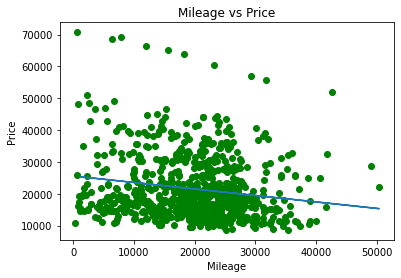

In [16]:
#2. Chart the original data and the equation on the chart
plt.scatter(x, y, color='g')
plt.plot(X_train, reg.predict(X_train))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

In [18]:
# Find the equation's R2 score
Score=reg.score(X_train,y_train)
print(Score)

0.027542762715027647


The Score for this model is very less than 0.8 there is not correlation between the values

# Part 2
1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

2. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

3. Find the combination of the factors that is the best predictor for price.

In [19]:
X=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
y=df["Price"]

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:

lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [23]:
#1 linear regression
print('intercept:', lreg.intercept_)
print('coefficients:', lreg.coef_[0])

intercept: 5646.931137899097
coefficients: -0.1766914212623471


In [24]:
# 2. Find the equation's R2 score

print('r-squared: ', lreg.score(X_train, y_train))


r-squared:  0.47191555755912684


Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

2. Find the best combination of factors to predict price.

In [30]:
# 1.
df_dummy = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])
df_dummy.head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [32]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_dummy[columns]
y = df_dummy['Price']

regr= LinearRegression()
regr.fit(X, y)

LinearRegression()

In [33]:
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_[0])
print('Score:', regr.score(X, y))

Intercept: 23983.77190961674
Coefficient: -0.18486246603383974
Score: 0.9363889951039477


In [35]:
# 2 . 
corr = df.corr()["Price"].sort_values(ascending=False)[1:]
abs_corr = abs(corr)
features = abs_corr[abs_corr>0.4]
print(features)

Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Name: Price, dtype: float64
